# Data Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('f:/NTU Learn/DATA MINING/DMproject')
os.getcwd()

'f:\\NTU Learn\\DATA MINING\\DMproject'

## Load Data

In [4]:
ml_20m_train_matrix_df = pd.read_parquet(r'data\ml-20m\ml_20m_train_matrix_df.parquet')
book_crossing_train_matrix_df = pd.read_parquet(r'data\book_crossing\book_crossing_train_matrix_df.parquet')

In [5]:
ml_20m_train_matrix_df.shape, book_crossing_train_matrix_df.shape

((3000, 25511), (2996, 25000))

## Statistical Description

In [37]:
ml_20m_df = pd.read_parquet(r'data\ml-20m\feature_df_0.parquet')
book_crossing_df = pd.read_parquet(r'data\book_crossing\feature_df_0.parquet')

In [40]:
ml_20m_df.loc[:,['userId','itemId','rating']].describe()

,userId,itemId,rating
count,3.794270e+06,3.794270e+06,3.794270e+06
mean,6.938895e+04,1.390905e+04,3.279123e+00
std,3.989318e+04,2.464713e+04,1.036924e+00
min,1.040000e+02,1.000000e+00,5.000000e-01
25%,3.458700e+04,1.603000e+03,3.000000e+00
50%,6.985000e+04,3.467000e+03,3.500000e+00
75%,1.031990e+05,7.024000e+03,4.000000e+00
max,1.383970e+05,1.312600e+05,5.000000e+00


In [45]:
ml_20m_df.columns.to_list()

['userId',
 'itemId',
 'rating',
 'timestamp',
 'item_mean_rating',
 'user_mean_rating',
 'user_hist',
 'title',
 'genres',
 'year',
 'title_tfidf_0',
 'title_tfidf_1',
 'title_tfidf_2',
 'title_tfidf_3',
 'title_tfidf_4',
 'title_tfidf_5',
 'title_tfidf_6',
 'title_tfidf_7',
 'title_tfidf_8',
 'title_tfidf_9',
 'title_tfidf_10',
 'title_tfidf_11',
 'title_tfidf_12',
 'title_tfidf_13',
 'title_tfidf_14',
 'title_tfidf_15',
 'title_tfidf_16',
 'title_tfidf_17',
 'title_tfidf_18',
 'title_tfidf_19',
 'title_tfidf_20',
 'title_tfidf_21',
 'title_tfidf_22',
 'title_tfidf_23',
 'title_tfidf_24',
 'title_tfidf_25',
 'title_tfidf_26',
 'title_tfidf_27',
 'title_tfidf_28',
 'title_tfidf_29',
 'title_tfidf_30',
 'title_tfidf_31',
 'title_tfidf_32',
 'title_tfidf_33',
 'title_tfidf_34',
 'title_tfidf_35',
 'title_tfidf_36',
 'title_tfidf_37',
 'title_tfidf_38',
 'title_tfidf_39',
 'title_tfidf_40',
 'title_tfidf_41',
 'title_tfidf_42',
 'title_tfidf_43',
 'title_tfidf_44',
 'title_tfidf_45',
 't

In [41]:
book_crossing_df.loc[:,['userId','itemId','rating']].describe()

,userId,itemId,rating
count,124710.000000,124710.000000,124710.000000
mean,135455.817192,33510.782279,7.842683
std,80742.571057,41779.691099,1.773530
min,242.000000,1.000000,1.000000
25%,68555.000000,5070.750000,7.000000
50%,131837.000000,17192.000000,8.000000
75%,206691.000000,46274.000000,9.000000
max,278633.000000,269554.000000,10.000000


In [44]:
book_crossing_df.columns.tolist()

['userId',
 'rating',
 'itemId',
 'item_mean_rating',
 'user_mean_rating',
 'title',
 'author',
 'year',
 'publisher',
 'title_tfidf_0',
 'title_tfidf_1',
 'title_tfidf_2',
 'title_tfidf_3',
 'title_tfidf_4',
 'title_tfidf_5',
 'title_tfidf_6',
 'title_tfidf_7',
 'title_tfidf_8',
 'title_tfidf_9',
 'title_tfidf_10',
 'title_tfidf_11',
 'title_tfidf_12',
 'title_tfidf_13',
 'title_tfidf_14',
 'title_tfidf_15',
 'title_tfidf_16',
 'title_tfidf_17',
 'title_tfidf_18',
 'title_tfidf_19',
 'title_tfidf_20',
 'title_tfidf_21',
 'title_tfidf_22',
 'title_tfidf_23',
 'title_tfidf_24',
 'title_tfidf_25',
 'title_tfidf_26',
 'title_tfidf_27',
 'title_tfidf_28',
 'title_tfidf_29',
 'title_tfidf_30',
 'title_tfidf_31',
 'title_tfidf_32',
 'title_tfidf_33',
 'title_tfidf_34',
 'title_tfidf_35',
 'title_tfidf_36',
 'title_tfidf_37',
 'title_tfidf_38',
 'title_tfidf_39',
 'title_tfidf_40',
 'title_tfidf_41',
 'title_tfidf_42',
 'title_tfidf_43',
 'title_tfidf_44',
 'title_tfidf_45',
 'title_tfidf_46'

## Matrix Sparsity

In [28]:
def plot_sparsity_heatmap(df, data_set_name=None):
    """
    Visualize the user-item rating matrix as a heatmap with gradient colors.
    
    Args:
    df (pd.DataFrame): A pandas DataFrame where rows represent users, columns represent items, 
                       and the values represent ratings (0 indicates missing rating, other values between 0.5 and 5).
                       
    Returns:
    A heatmap visualizing the user-item rating matrix with gradient colors representing the rating values.
    """
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    # Using 'coolwarm' colormap to show gradient (can be changed to others like 'viridis', 'plasma', etc.)
    plt.imshow(df.values, aspect='auto', cmap='coolwarm', interpolation='nearest')
    
    # Add a colorbar to indicate the rating scale
    plt.colorbar(label='Rating Value (0 = Missing, 0.5 to 5 = Ratings)')
    
    # Add labels and title
    plt.title(f'"{data_set_name}" User-Item Rating Matrix Sparsity Heatmap')
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks([])
    plt.yticks([])
    
    # Show the plot
    plt.show()

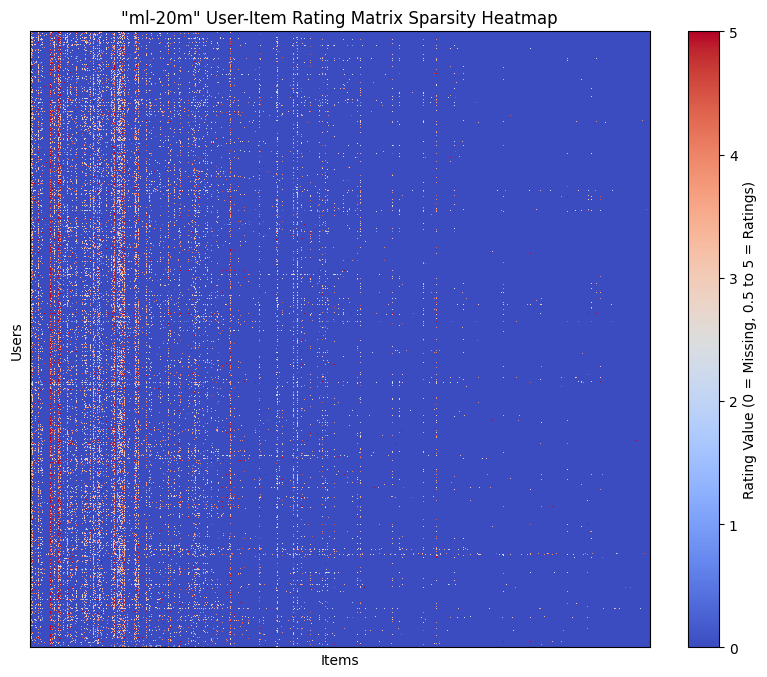

In [29]:
plot_sparsity_heatmap(ml_20m_train_matrix_df, data_set_name='ml-20m')

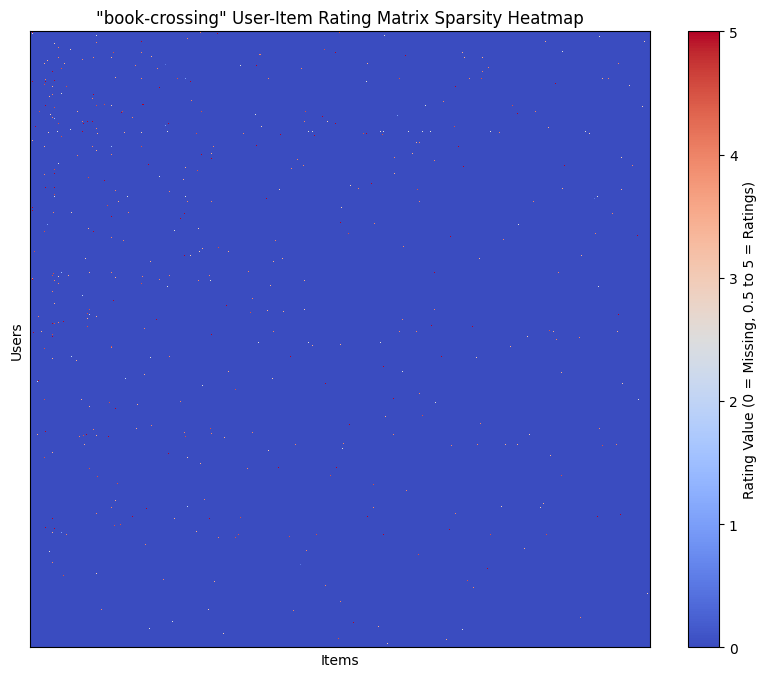

In [30]:
plot_sparsity_heatmap(book_crossing_train_matrix_df, data_set_name='book-crossing')